---

**Load essential libraries**

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import tensorflow as tf

---

**Check TensorFlow version**

---

In [2]:
tf.__version__

'2.15.0'

---

Answer the following questions inline using the documentation from:
 - Introduction to tensors https://www.tensorflow.org/guide/tensor
 - Introduction to variables https://www.tensorflow.org/guide/variable
 - Introduction to gradients and automatic differentiation https://www.tensorflow.org/guide/autodiff

 ---


1. A scalar is a rank $\underbrace{0/1/2}_\text{choose one}$ tensor.
2. *True/false*: a scalar has no axes.
3. A matrix is a rank $\underbrace{0/1/2}_\text{choose one}$ tensor and has $\underbrace{1/2}_\text{choose one}$ axes.
4. What does the function call $\texttt{tf.reshape(A, [-1]}$ does for a given tensor $\texttt{A}$?
5. *True/false*: $\texttt{tf.reshape()}$ can be used to swap axes of a tensor such as $\texttt{(patients, timestamps, features)}$ to $\texttt{(timestamps, patients, features)},$
6. $\texttt{tf.keras}$ uses $\underline{\qquad\qquad\qquad}$ to store model parameters.
7. *True/false*: calling $\texttt{assign}$ reuses a tensor's exisiting memory to assign the values.
8. *True/false*:  creating a new tensor $\texttt{b}$ based on the value of another tensor $\texttt{a}$ as $\texttt{b = tf.Variable(a)}$ will have the tensors allocated different memory.
9. *True/false*: two tensor variables can have the same name.
10. An example of a variable that would not need gradients is a $\underline{\qquad\qquad\qquad\qquad}.$
11. Tensor variables are typically placed in $\underbrace{\text{CPU/GPU}}_{\text{choose one}}.$
12. *True/false*: a tensor variable is trainable by default.
13. A gradient tape tape will automatically watch a $\underbrace{\texttt{tf.Variable/tf.constant}}_\text{choose one}$ but not a $\underbrace{\texttt{tf.Variable/tf.constant}}_\text{choose one}.$
14. What attribute can be used to calculate a layer's gradient w.r.t. all its trainable variables?
15. The option $\texttt{persistent = True}$ for a gradient tape $\underbrace{\texttt{stores/discards}}_\text{choose one}$ all intermediate results during the forward pass.
16. Executing the statement $\texttt{print(type(x).__name__)}$ when $\texttt{x}$ is a constant and when $\texttt{x}$ is a variable results in what?
17. Which one among $\texttt{tf.Tensor}$ and $\texttt{tf.Variable}$ is immutable? Which one has no state but only value? Which one has a state which is actually its value?







---

Answers:
1. Scalar is a rank **0** tensor.  
2. True.  
3. A matrix is a rank **2** tensor and has 2 axes.  
4. Fits the tensor in "whatever good shape" that is possible.  
5. False. We use tf..transpose for this operation.  
6. tf.keras use tf.Variable to store model parameters.  
7. True.  
8. True. Two variables will not share the same memory.  
9. True.  
10. Constant.  
11. GPU. For better performance, tensorflow will appempt to place a variable on a faster running device compatible with its dtype. So most variables are placed on a GPU, if available. However, we can override this, and place a float tensor and a variable on a CPU, even if a GPU is available.  
12. True. We can turn it off during creation by setting trainable=False.  
13. A gradient tape will automatically watch a tf.Variable but not a tf.constant.  
14. Module.trainable_variables.  
15. stores.  
16. If x is a constant, the output will be the data type of x.   
    If x is a variable, the output will be the data type of the value stored in that variable at the time of execution.  
17. Immutable: tf.Tensor.  
    No state but only one value: tf.Tensor.  
    Has a state which is actually its value: tf.Variable. 

---

Consider a 1-layer neural network for a sample with 3 features: heart rate, blood pressure, and temperature and 2 possible output categories: diabetic and non-diabetic.

An individual who is diabetic has heart rate = 76 BPM, BP = 120 mm Hg, and temperature = 37.5 $^\circ\text{C}.$

Here is the forward propagation: $$\mathbf{x}\longrightarrow\mathbf{x}_B=\begin{bmatrix}\mathbf{x}\\1\end{bmatrix}\longrightarrow\mathbf{z}^{[1]} = \mathbf{W}^{[1]}\mathbf{x}_B\longrightarrow\underbrace{\mathbf{a}^{[1]}}_{=\hat{\mathbf{y}}} = \text{softmax}\left(\mathbf{a}^{[1]}\right)\longrightarrow L = \sum_{k=0}^1-y_k\log\left(\hat{y}_k\right).$$

*   Fill in the missing entries of the code below to calculate the gradients there-in.
* Explain why some gradient shapes do not seem to match with the usual $\text{input shape}\times\text{output shape}$ rule for gradient shapes using the documentation on [Gradients of non-scalar target](https://www.tensorflow.org/guide/autodiff#gradients_of_non-scalar_targets) as resource.
* Try $\texttt{persistent = true}$ and $\texttt{persistent = false}$ in the gradient tape and observe what happens in each case.

---

In [14]:
x = tf.constant([76., 120., 37.5], dtype = float)
y = tf.constant([0, 1])
xB = tf.concat([x, 1.0*tf.ones(1)], axis = 0)
W = tf.Variable(0.01*(tf.random.normal((2, 4))))

with tf.GradientTape(persistent = True) as g:
  z = tf.linalg.matvec(W, xB)
  a = tf.nn.softmax(z)
  yhat = a
  L = tf.reduce_sum(-tf.one_hot(indices=y, depth=2))*tf.math.log(yhat)
  L.numpy()

print('Loss = ', L.numpy())
print('Gradient of L w.r.t. yhat')
gradL_yhat = g.gradient(L, yhat)
print(gradL_yhat)
print('-----')
print('Gradient of a w.r.t. z')
grada_z = g.gradient(a, z)
print(grada_z)
print('-----')
print('Gradient of z w.r.t. W')
gradz_W = g.gradient(z, W)
print(gradz_W)
print('-----')
print('Gradient of L w.r.t. W')
gradL_W = g.gradient(L, W)
print(gradL_W)

# Delete gradient tape and release memory
del g

Loss =  [1.2740165 1.5052521]
Gradient of L w.r.t. yhat
tf.Tensor([-3.7816312 -4.2451334], shape=(2,), dtype=float32)
-----
Gradient of a w.r.t. z
tf.Tensor([0. 0.], shape=(2,), dtype=float32)
-----
Gradient of z w.r.t. W
tf.Tensor(
[[ 76.  120.   37.5   1. ]
 [ 76.  120.   37.5   1. ]], shape=(2, 4), dtype=float32)
-----
Gradient of L w.r.t. W
tf.Tensor(
[[  8.777179    13.858703     4.330845     0.11548919]
 [ -8.777175   -13.858697    -4.330843    -0.11548914]], shape=(2, 4), dtype=float32)


---

Recalculate gradients pen-and-paper-way with the same weights from above using numpy. Compare the gradient results here with the ones that you had from the previous cell. Why are some gradients different? In both approaches (in this cell and in the one above), is the gradient of interest $\nabla_{\mathbf{W}^{[1]}}(L)$ the same? Note that this is the only gradient we need to update the weights matrix $\mathbf{W}^{[1]}.$


---

In [16]:
x = tf.constant([76., 120., 37.5], dtype = float)
y = tf.constant([0, 1])
xB = tf.concat([x, 1.0*tf.ones(1)], axis = 0)
W = tf.Variable(0.01*(tf.random.normal((2, 4))))

with tf.GradientTape(persistent = True) as g:
  z = tf.linalg.matvec(W, xB)
  a = tf.nn.softmax(z)
  yhat = a
  L = tf.reduce_sum(-tf.one_hot(indices=y, depth=2))*tf.math.log(yhat)
  L.numpy()

print('Loss = ', L.numpy())
print('Gradient of L w.r.t. yhat')
gradL_yhat = g.gradient(L, yhat)
print(gradL_yhat)
print('-----')
print('Gradient of a w.r.t. z')
grada_z = g.gradient(a, z)
print(grada_z)
print('-----')
print('Gradient of z w.r.t. W')
gradz_W = g.gradient(z, W)
print(gradz_W)
print('-----')
print('Gradient of L w.r.t. W')
gradL_W = g.gradient(L, W)
print(gradL_W)

# Delete gradient tape and release memory
del g

Loss =  [1.7351705 1.0893317]
Gradient of L w.r.t. yhat
tf.Tensor([-4.762308  -3.4480643], shape=(2,), dtype=float32)
-----
Gradient of a w.r.t. z
tf.Tensor([0. 0.], shape=(2,), dtype=float32)
-----
Gradient of z w.r.t. W
tf.Tensor(
[[ 76.  120.   37.5   1. ]
 [ 76.  120.   37.5   1. ]], shape=(2, 4), dtype=float32)
-----
Gradient of L w.r.t. W
tf.Tensor(
[[-24.330814   -38.417076   -12.005336    -0.3201423 ]
 [ 24.330816    38.41708     12.005338     0.32014233]], shape=(2, 4), dtype=float32)


In [17]:
x = tf.constant([76., 120., 37.5], dtype = float)
y = tf.constant([0, 1])
xB = tf.concat([x, 1.0*tf.ones(1)], axis = 0)
W = tf.Variable(0.01*(tf.random.normal((2, 4))))

with tf.GradientTape(persistent = False) as g:
  z = tf.linalg.matvec(W, xB)
  a = tf.nn.softmax(z)
  yhat = a
  L = tf.reduce_sum(-tf.one_hot(indices=y, depth=2))*tf.math.log(yhat)
  L.numpy()

print('Loss = ', L.numpy())
print('Gradient of L w.r.t. yhat')
gradL_yhat = g.gradient(L, yhat)
print(gradL_yhat)
print('-----')
print('Gradient of a w.r.t. z')
grada_z = g.gradient(a, z)
print(grada_z)
print('-----')
print('Gradient of z w.r.t. W')
gradz_W = g.gradient(z, W)
print(gradz_W)
print('-----')
print('Gradient of L w.r.t. W')
gradL_W = g.gradient(L, W)
print(gradL_W)

# Delete gradient tape and release memory
del g

Loss =  [0.6417725 2.5856497]
Gradient of L w.r.t. yhat
tf.Tensor([-2.7566977 -7.286126 ], shape=(2,), dtype=float32)
-----
Gradient of a w.r.t. z


RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

---

For each activation function below,

1.   Sigmoid $\sigma(z)$
2.   Hyperbolic tangent $\tanh(z)$
3.   Rectified Linear Unit $\text{ReLU}(z)$
4.   Leaky rectified linear unit $\text{LReLU}(z)$

*   plot the activation and its gradient in the same figure for raw score values $z$ ranging between $-10$ and $10$;
*   comment on whether the backward flowing gradient on the input side of the activation layer will have a smaller or bigger magnitude compared to the backward flowing gradient on the output side of the activation layer. Recall that what connects these two gradients is the local gradient of the activation layer which you may have just plotted.





---


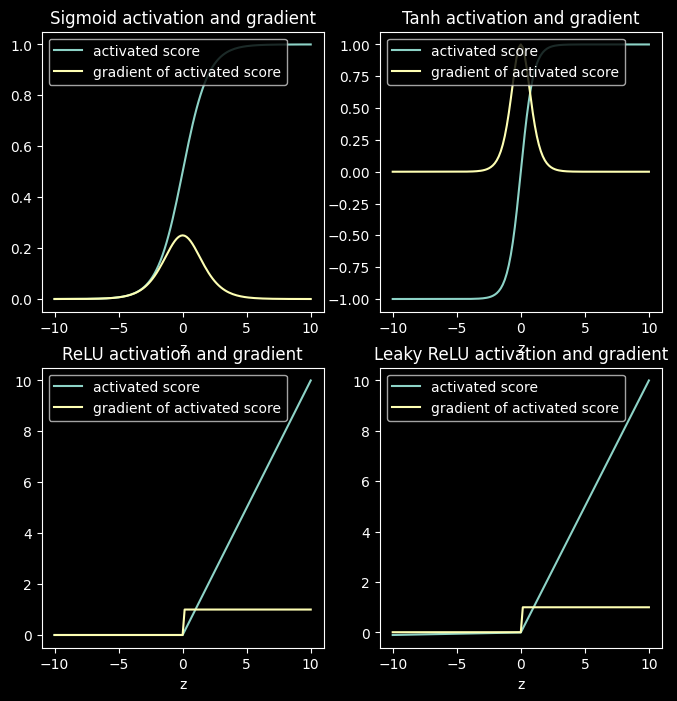

In [19]:
z = tf.linspace(-10.0, 10.0, 129) # A tf.Tensor, not a tf.Variable

with tf.GradientTape(persistent = True) as g:
    g.watch(z)
    a_sigmoid = tf.math.sigmoid(z)
    a_tanh = tf.math.tanh(z)
    a_ReLU = tf.cast(z, tf.float64) * tf.cast((z > 0), tf.float64)
    a_LReLU = tf.cast(z, tf.float64) * tf.cast((z > 0.0), tf.float64) + 0.01 * tf.cast(z, tf.float64) * tf.cast((z <= 0.0), tf.float64)



grada_sigmoid_z = g.gradient(a_sigmoid, z)
grada_tanh_z = g.gradient(a_tanh, z)
grada_ReLU_z = g.gradient(a_ReLU, z)
grada_LReLU_z = g.gradient(a_LReLU, z)

fig, axs = plt.subplots(2, 2, figsize = (8, 8))
axs[0, 0].plot(z, a_sigmoid, label = 'activated score')
axs[0, 0].plot(z, grada_sigmoid_z, label='gradient of activated score')
axs[0, 0].legend(loc = 'upper left')
axs[0, 0].set_xlabel('z')
axs[0, 0].set_title('Sigmoid activation and gradient');

axs[0, 1].plot(z, a_tanh, label = 'activated score')
axs[0, 1].plot(z, grada_tanh_z, label='gradient of activated score')
axs[0, 1].legend(loc = 'upper left')
axs[0, 1].set_xlabel('z')
axs[0, 1].set_title('Tanh activation and gradient');

axs[1, 0].plot(z, a_ReLU, label = 'activated score')
axs[1, 0].plot(z, grada_ReLU_z, label='gradient of activated score')
axs[1, 0].legend(loc = 'upper left')
axs[1, 0].set_xlabel('z')
axs[1, 0].set_title('ReLU activation and gradient');

axs[1, 1].plot(z, a_LReLU, label = 'activated score')
axs[1, 1].plot(z, grada_LReLU_z, label='gradient of activated score')
axs[1, 1].legend(loc = 'upper left')
axs[1, 1].set_xlabel('z')
axs[1, 1].set_title('Leaky ReLU activation and gradient');